# EDA 

__para este doctumento trabajaremos con un analisis exploratorio(EDA) con este analisis podremos tener un conocimiento mas amplio respecto a nuestra problematica y puntos a resolver tomando graficas de puntos importante de un buen desarollo de contexto y asi podemos tomas deciciones mas amplias a lo que el cliente quiere__

# Importamos librerias

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
hechos_df = pd.read_csv('./Data_clean/homicidios_hechos.csv')
victimas_df = pd.read_csv('./Data_clean/homicidios_victimas_ID_UNICO.csv')

* Histograma para distribucion de edad

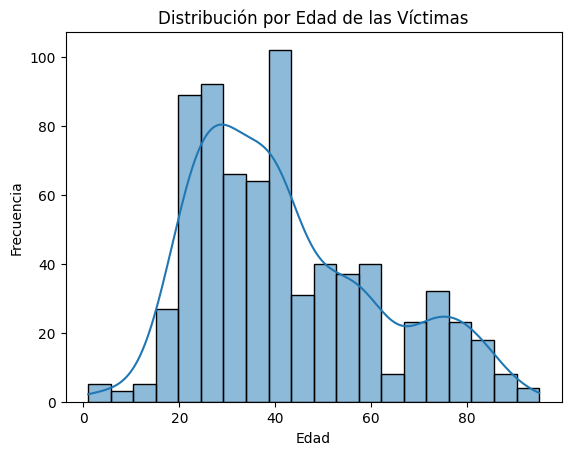

In [34]:
sns.histplot(victimas_df['Edad'], kde=True, bins=20)
plt.title('Distribución por Edad de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

La distribución de las víctimas está sesgada hacia la derecha, lo que significa que hay más víctimas en los grupos de edad más jóvenes y el número de víctimas disminuye a medida que aumenta la edad. por lo que la edad en la que mass accidentes suelen suceder es de los 20 a los 50

* distribucion por genero 

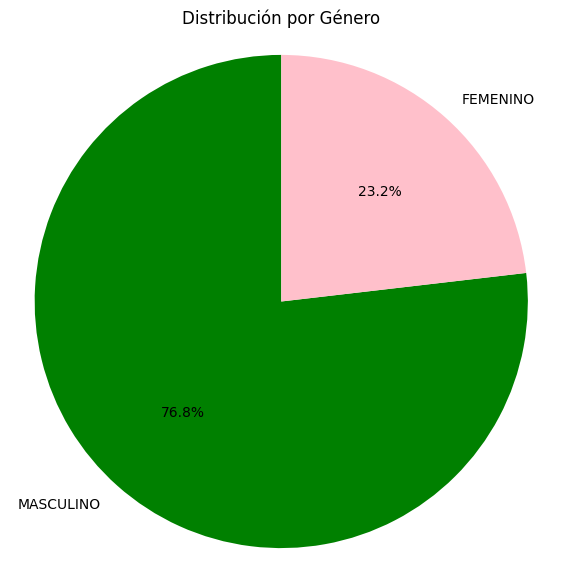

In [40]:
# Contar la cantidad de víctimas por género
genero_counts = victimas_df['Sexo'].value_counts()

# Crear gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=90, colors=['green','pink'])
plt.title('Distribución por Género')
plt.axis('equal') 
plt.show()

* Edad y Genero

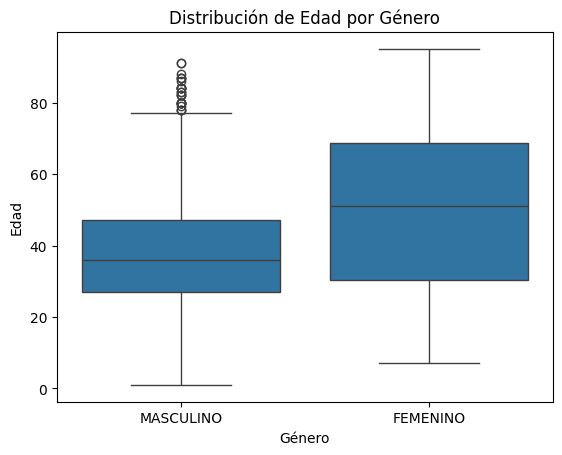

In [44]:
sns.boxplot(x='Sexo', y='Edad', data=victimas_df)
plt.title('Distribución de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()


Las mujeres tienen una distribución de edad más alta, con una mediana significativamente mayor que los hombres.
La varianza en la edad de las mujeres también es mayor, dado que la caja y los bigotes cubren un rango más amplio en comparación con los hombres.
Los hombres presentan más valores atípicos en las edades superiores, lo que puede indicar un mayor número de individuos mayores de 80 años en esa categoría.

* Edad promedio 

In [91]:
def calcular_edad_promedio(df):
    if pd.api.types.is_numeric_dtype(df['Edad']):
        # Eliminar valores nulos antes de calcular la media
        edad_promedio = df['Edad'].dropna().mean()
        
        if pd.notnull(edad_promedio):
            return edad_promedio
        else:
            print("No se pudo calcular la edad promedio. Revisa los datos.")
            return None
    else:
        print("La columna 'Edad' no es numérica.")
        return None
    
   
edad_promedio = calcular_edad_promedio(victimas_df)

if edad_promedio is not None:
    print(f"La edad promedio es: {edad_promedio:.2f} años")
else:
    print("No se pudo calcular la edad promedio.")



La edad promedio es: 42.18 años


* frecuencia por rol

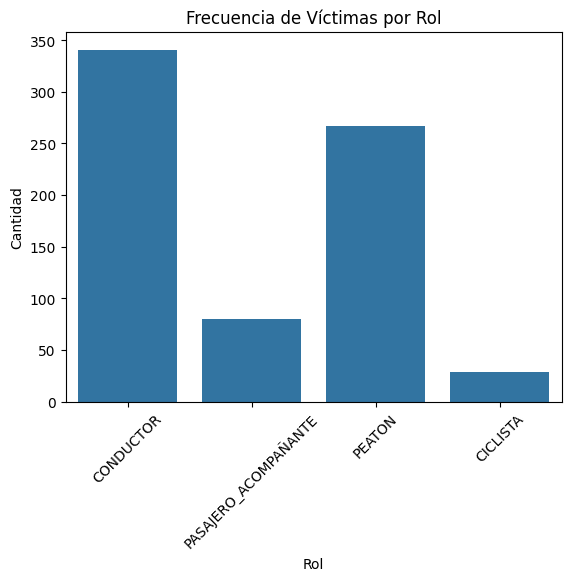

In [45]:
sns.countplot(x='Rol', data=victimas_df)
plt.title('Frecuencia de Víctimas por Rol')
plt.xlabel('Rol')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


El rol con mayor frecuencia de víctimas es el de "conductor", seguido por "peatón". "Pasajero acompañante" y "ciclista" tienen frecuencias de víctimas mucho menores.

* Fallecimientos por años

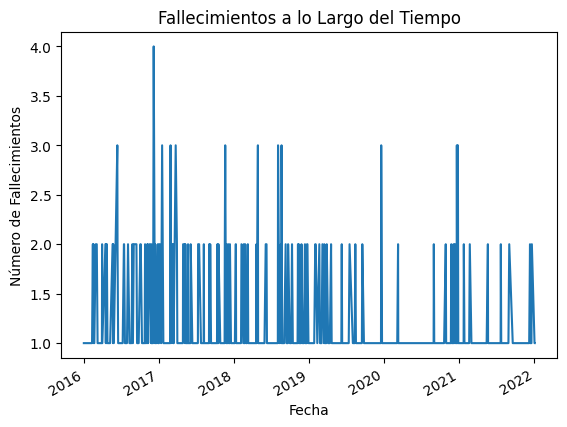

In [46]:
victimas_df['Fecha fallecimiento'] = pd.to_datetime(victimas_df['Fecha fallecimiento'])

victimas_df.groupby('Fecha fallecimiento').size().plot(kind='line')
plt.title('Fallecimientos por año')
plt.xlabel('Fecha')
plt.ylabel('Número de Fallecimientos')
plt.show()


Picos en los datos:
El gráfico muestra picos ocasionales donde el número de fallecimientos alcanza valores cercanos a 4 en ciertos momentos, especialmente entre 2016 y 2018. Estos picos indican posibles eventos con múltiples víctimas en esos momentos.

Largos períodos con pocos datos:
A partir de 2019, hay períodos más largos con valores cercanos a 1, lo que puede sugerir una disminución en el número de fallecimientos reportados o menos eventos trágicos durante esos años.

* Eventos por año

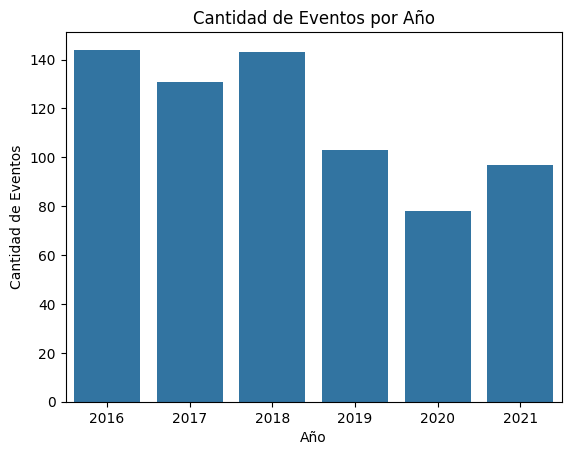

In [56]:
sns.countplot(x='Año', data=hechos_df)
plt.title('Cantidad de Eventos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Eventos')
plt.show()


creemos que la baja de eventos en el año 2019 en adelante disminuyo tanto por la pandemia mas que implementacion de medidas de seguridad

* Fallecimientos por mes

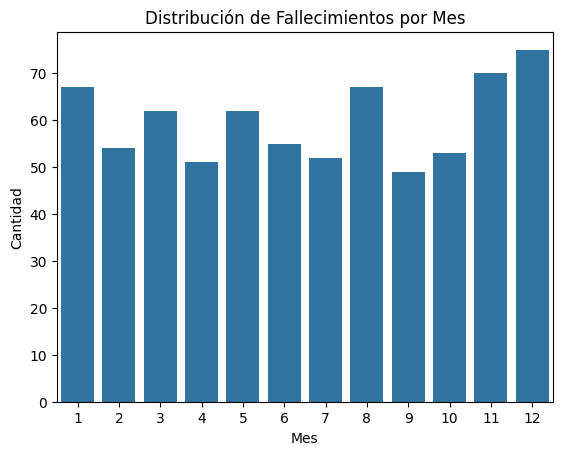

In [49]:
victimas_df['Mes'] = victimas_df['Fecha fallecimiento'].dt.month

# Gráfico de barras para fallecimientos por mes
sns.countplot(x='Mes', data=victimas_df)
plt.title('Distribución de Fallecimientos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.show()


la mayor cantidad de eventos ocurren durante diciembre y enero por lo que sugerimos implementar mas seguridades viales durantes estos meses como controles de alcholimetro 

* cantidad de victimas por accidente

C:\Users\rizo_\AppData\Local\Temp\ipykernel_38728\1474597511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victimas_counts.index, y=victimas_counts.values, palette='viridis')


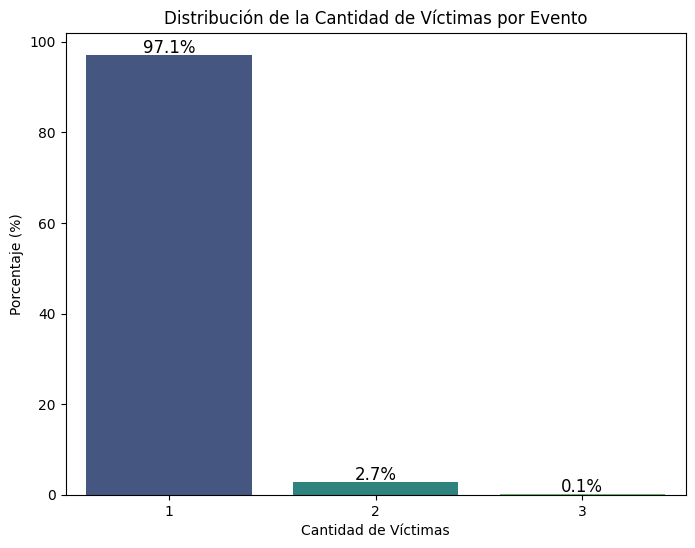

In [55]:
# Calcular las frecuencias y los porcentajes
victimas_counts = hechos_df['Cantidad de victimas'].value_counts(normalize=True) * 100  # Normalizar para obtener el porcentaje

# Crear gráfico de barras con porcentajes
plt.figure(figsize=(8, 6))
sns.barplot(x=victimas_counts.index, y=victimas_counts.values, palette='viridis')

# Añadir etiquetas y título
plt.title('Distribución de la Cantidad de Víctimas por Evento')
plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Porcentaje (%)')

# Mostrar los valores sobre las barras
for i, v in enumerate(victimas_counts.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=12)
plt.show()


la gran mayoría de los eventos involucran a una sola víctima, con muy pocos eventos que tengan múltiples víctimas. Es decir, los eventos con 2 o más víctimas no son muy frecuentes

Mayoría de eventos con 1 víctima:
El 97.1% de los eventos tienen solo 1 víctima. Este es, con diferencia, el valor más común.

Eventos con 2 víctimas:
El 2.7% de los eventos tienen 2 víctimas. Aunque no es frecuente, representa una minoría significativa en comparación con los eventos de una víctima.

Eventos con 3 víctimas:
Solo el 0.1% de los eventos tienen 3 víctimas, lo que indica que es un escenario muy raro.

* eventos por hora del dia

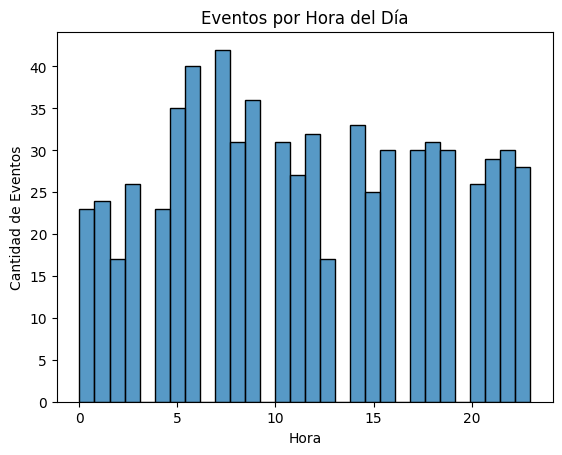

In [61]:
sns.histplot(hechos_df['Hora'], kde=False, bins=30)
plt.title('Eventos por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Eventos')
plt.show()


picos de eventos: 
Las horas entre las 5:00 AM y 6:00 AM muestran el mayor número de eventos, con más de 40 eventos en esas horas.
También hay un aumento notable alrededor de las 7:00 AM

Tendencias:
Durante la madrugada (de medianoche a las 4:00 AM), hay menos eventos, pero a partir de las 5:00 AM, el número de eventos aumenta considerablemente.
Entre las 10:00 AM y 12:00 PM hay una ligera disminución, pero luego vuelve a subir hasta estabilizarse en horas de la tarde y noche.
Después de las 7:00 PM, el número de eventos tiende a ser más constante, aunque levemente menor que en las primeras horas de la mañana.

 la mayoría de los eventos parecen concentrarse en las primeras horas de la mañana, especialmente alrededor de las 5:00 y 6:00 AM. Luego, hay una distribución más homogénea durante el resto del día, con un ligero descenso en la madrugada y algunas fluctuaciones en la tarde.


* eventos por tipo de calle

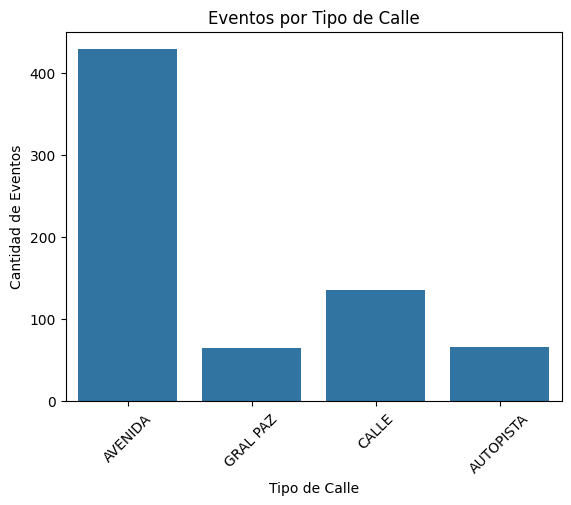

In [62]:
sns.countplot(x='Tipo de calle', data=hechos_df)
plt.title('Eventos por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Eventos')
plt.xticks(rotation=45)
plt.show()


observando la grafica tenemos resultados en los que la mayoria de evento se dan acabo en las avenidas por lo que la solucion que podria implementarse es hacer un control del transito, ajustando la velocidad limite o inlcuso agregando señalamientos claros junto algunas medidas diferentes como las foto multas.


* relacion entre hora y el mumero de victimas

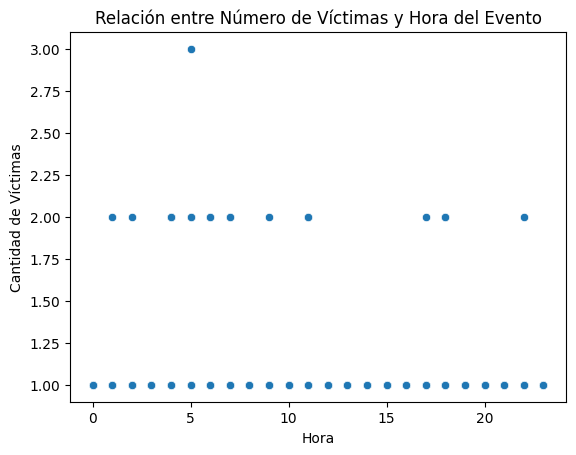

In [68]:
# Gráfico de dispersión para la relación entre víctimas y la hora
sns.scatterplot(x='Hora', y='Cantidad de victimas', data=hechos_df)
plt.title('Relación entre Número de Víctimas y Hora del Evento')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Víctimas')
plt.show()


ayuda a visualizar a qué horas ocurrieron eventos y cuántas víctimas estuvieron involucradas en esos eventos. La mayor parte de los eventos tienen una sola víctima, y no parece haber una concentración clara de eventos en alguna hora específica del día por lo que se recomienda utilizar otro metodo de visualizacion de este dato.

* numero de victimas en cada comuna

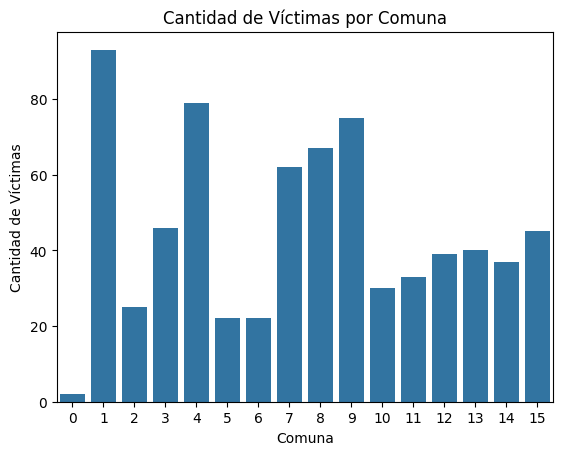

In [69]:
# Agrupar y combinar datasets
victimas_por_comuna = hechos_df.groupby('Comuna')['Cantidad de victimas'].sum().reset_index()

sns.barplot(x='Comuna', y='Cantidad de victimas', data=victimas_por_comuna)
plt.title('Cantidad de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.show()


con este grafico podemos observar en que comunas se deben de poner mas señalamientos de transito y crear alguna solucion al problema implementando mas seguridad vial

* Distribución de Víctimas por Género y Comuna

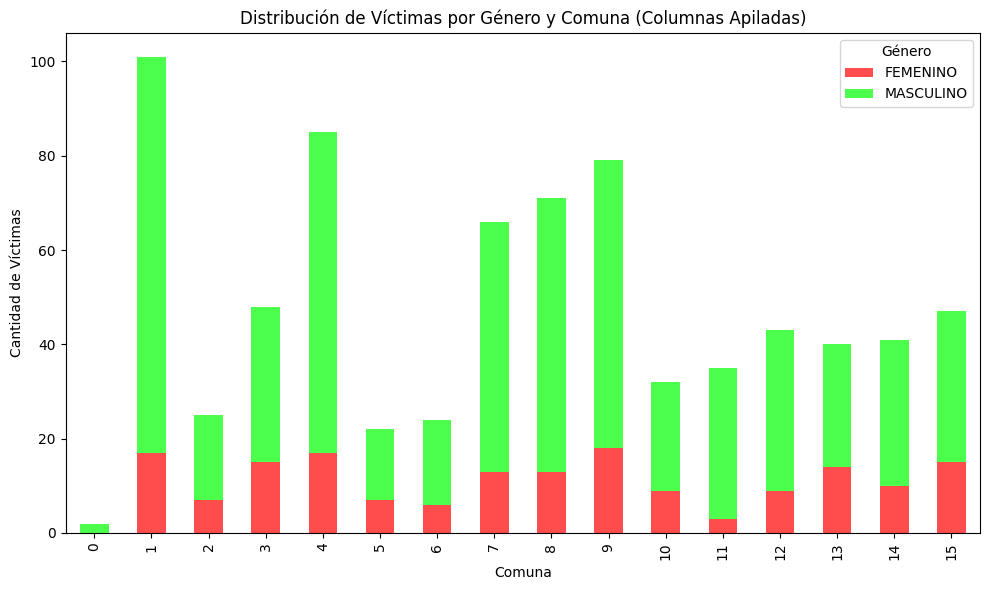

In [73]:
victimas_comuna_genero = victimas_df.merge(hechos_df, on='Id').groupby(['Comuna', 'Sexo'])['Cantidad de victimas'].sum().unstack()

colores = ['#ff4d4d', '#4dff4d', '#4d4dff']

victimas_comuna_genero.plot(kind='bar', stacked=True, color=colores, figsize=(10, 6))

plt.title('Distribución de Víctimas por Género y Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')

plt.legend(title='Género')
plt.tight_layout()
plt.show()


comprobamos que el genero con mas eventos dentro de las comunas siguen siendo los hombres, esto puede determinar que hay mas hombres en las calles que mujeres o que inlcuso que los hombres pueden tener menos cuidados que las mujeres

* top 10 de los participantes con mas accidentes

C:\Users\rizo_\AppData\Local\Temp\ipykernel_38728\3582250460.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=participantes_counts_top10.index, y=participantes_counts_top10.values, palette='Set2')


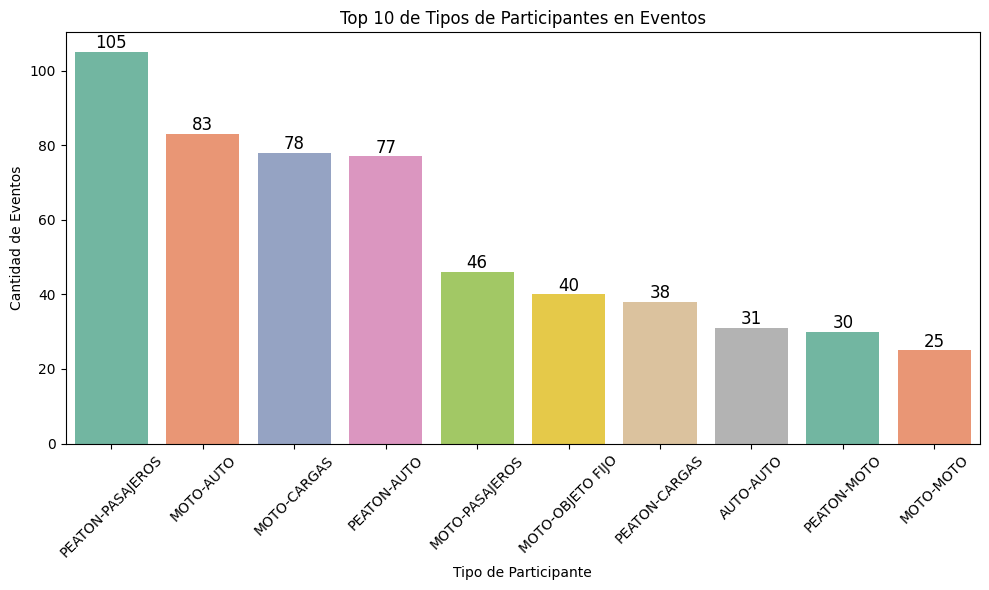

In [76]:
participantes_counts_top10 = hechos_df['Participantes'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=participantes_counts_top10.index, y=participantes_counts_top10.values, palette='Set2')
plt.title('Top 10 de Tipos de Participantes en Eventos')
plt.xlabel('Tipo de Participante')
plt.ylabel('Cantidad de Eventos')

for i, v in enumerate(participantes_counts_top10.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize=12)

plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()


podemos observar que los acidentes mas comunes o numero uno suele ser a peatones por lo que podriamos optar por una solucion como serian topes peatonales o implementacion de mas semaforon dentro de las comunas